# 12th of July, 2018
## Benjamin Adam Catching
## Andino Lab Rotation
## Poliovirus DIP Project

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob

import skimage.filters
import skimage.morphology
import skimage.io
import skimage.segmentation
import skimage.exposure
import skimage.feature
import pprint
import scipy.ndimage

In [169]:
class Bulk_droplet:
    """Create an image object from the read in file"""
    
    def __init__(self, filename, micron_per_pixel=1, gfp_thresh=0, multi_channel=False,
                testing=False):
        """Initialize the image data"""
        
        # Define input image attributes
        self.filename = filename
        self.image = skimage.io.imread(filename)
        self.micron_per_pixel = micron_per_pixel
        self.gfp_thresh = gfp_thresh
        self.shape = self.image.shape
        self.multi_channel = multi_channel
        
    def droplet_segment(self, testing=False):
        """Return droplets and their properties"""
        
        # If the image has multiple channels, choose the channel to determine droplets from
        if self.multi_channel:
            bright_channel = int(input('Input brightfield channel: '))
            image_bright = (self.image)[:, :, bright_channel]
        else:
            image_bright = self.image

        # Find the Otsu threshold
        bright_thresh_otsu = skimage.filters.threshold_otsu(image_bright)
        
        # Label thesholded images
        bright_threshold = image_bright > bright_thresh_otsu
        image_labeled, number_labels = skimage.measure.label(bright_threshold, background=0, return_num=True)
        
        # Get the properties of the labeled regions
        image_props = skimage.measure.regionprops(image_labeled)

        # Create a blank region of the original image
        blank_background= np.zeros(image_bright.shape)

        # Go through props
        for index, prop in enumerate(image_props):
            #print(prop.area)
            # If the region properties are within the threshold
            if prop.area >= 400 and prop.eccentricity <= 0.5:
                # Select the region
                #print(index)
                temp_seg = image_labeled==index+1
                filled_seg = temp_seg
                # Add the temp region
                blank_background = blank_background + filled_seg
        
        # Fill the holes of the image
        image_droplets = scipy.ndimage.binary_fill_holes(blank_background)
        
        
        # If testing is True, show the image
        if testing:
            with sns.axes_style("dark"):
                # Define the number of pixels in a millimeter
                mm = (1 / self.micron_per_pixel) * 500

                # Define the number of ticks
                num_x_ticks = (image_bright.shape)[1] // mm + 1
                num_y_ticks = (image_bright.shape)[0] // mm + 1
                plt.imshow(image_droplets)
                plt.xticks(np.arange(0, (image_bright.shape)[1], mm), np.arange(0, num_x_ticks))
                plt.yticks(np.arange(0, (image_bright.shape)[0], mm), np.arange(0, num_y_ticks))
                plt.xlabel("x-axis (mm)")
                plt.ylabel("y-axis (mm)")
                plt.title("Segmented Droplets")
                plt.show()
            
        image_labeled, number_labels = skimage.measure.label(image_droplets, background=0, return_num=True)
        
        # Get the properties of the labeled regions
        image_props = skimage.measure.regionprops(image_labeled)

            
        return image_labeled, image_props
    
    def find_brightfield_cells(self):
        """Return the brightfield cells"""
        
        # Call the labeled black-white droplet image and the associated properties
        image_labeled, image_props = self.droplet_segment()
        
        # Define the droplet images
        labeled_droplets, number_droplets = skimage.measure.label(image_labeled, background=0, return_num=True)
        bright_droplet_props = skimage.measure.regionprops(labeled_droplets, image_bright)
        
        return labeled_droplets, bright_droplet_props

In [170]:
# Read in all image files
new_image_file_names = "../../data/20180710_Microfludic_picture/*.tif"
new_image_files = glob.glob(new_image_file_names)
new_image_files = sorted(new_image_files)
pprint.pprint(new_image_files)

['../../data/20180710_Microfludic_picture/Snapshot of 1 - fast - 20x - stox '
 '-3.tif',
 '../../data/20180710_Microfludic_picture/Snapshot of 1 - fast - 40x - DIC - '
 '2.tif',
 '../../data/20180710_Microfludic_picture/Snapshot of 1 - fast - 40x - DIC '
 '-10.tif',
 '../../data/20180710_Microfludic_picture/Snapshot of 1 - fast - 40x - DIC '
 '-3.tif',
 '../../data/20180710_Microfludic_picture/Snapshot of 1 - fast - 40x - DIC '
 '-4.tif',
 '../../data/20180710_Microfludic_picture/Snapshot of 1 - fast - 40x - DIC '
 '-5.tif',
 '../../data/20180710_Microfludic_picture/Snapshot of 1 - fast - 40x - DIC '
 '-6.tif',
 '../../data/20180710_Microfludic_picture/Snapshot of 1 - fast - 40x - DIC '
 '-7.tif',
 '../../data/20180710_Microfludic_picture/Snapshot of 1 - fast - 40x - DIC '
 '-8.tif',
 '../../data/20180710_Microfludic_picture/Snapshot of 1 - fast - 40x - DIC '
 '-9.tif',
 '../../data/20180710_Microfludic_picture/Snapshot of 1 - fast - 40x - DIC.tif',
 '../../data/20180710_Microfludic_pi

In [180]:
# New test images from yesterday's imaging
test_image = Bulk_droplet(new_image_files[1], micron_per_pixel=2.243,
                gfp_thresh=50, multi_channel=True)

Input brightfield channel: 0


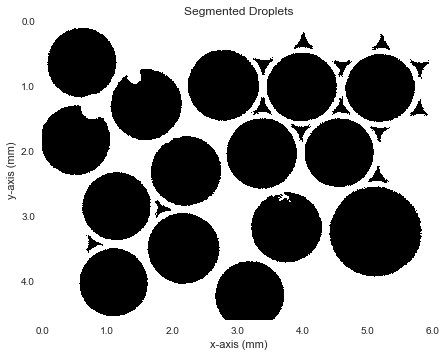

In [181]:
segmented_droplets, labeled_droplets = test_image.droplet_segment(testing=True)

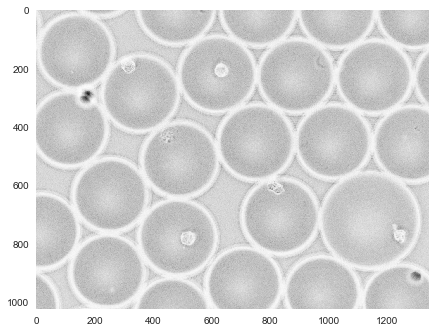

In [176]:
with sns.axes_style('dark'):
    temp = skimage.io.imread(new_image_files[1])[:, :, 1]
    plt.imshow(temp)
    plt.show()

In [182]:
image_bright = skimage.io.imread(new_image_files[1])[:, :, 1]
image_gfp = skimage.io.imread(new_image_files[1])
bright_droplet_props = skimage.measure.regionprops(segmented_droplets, image_bright)


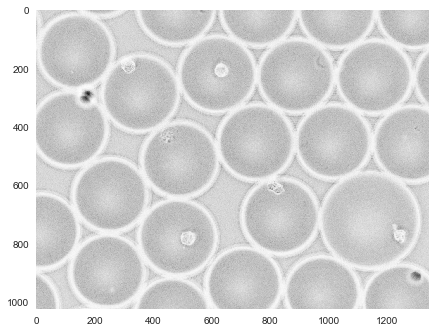

28


In [183]:
with sns.axes_style('dark'):
    plt.imshow(image_bright)
    plt.show()
print(len(labeled_droplets))

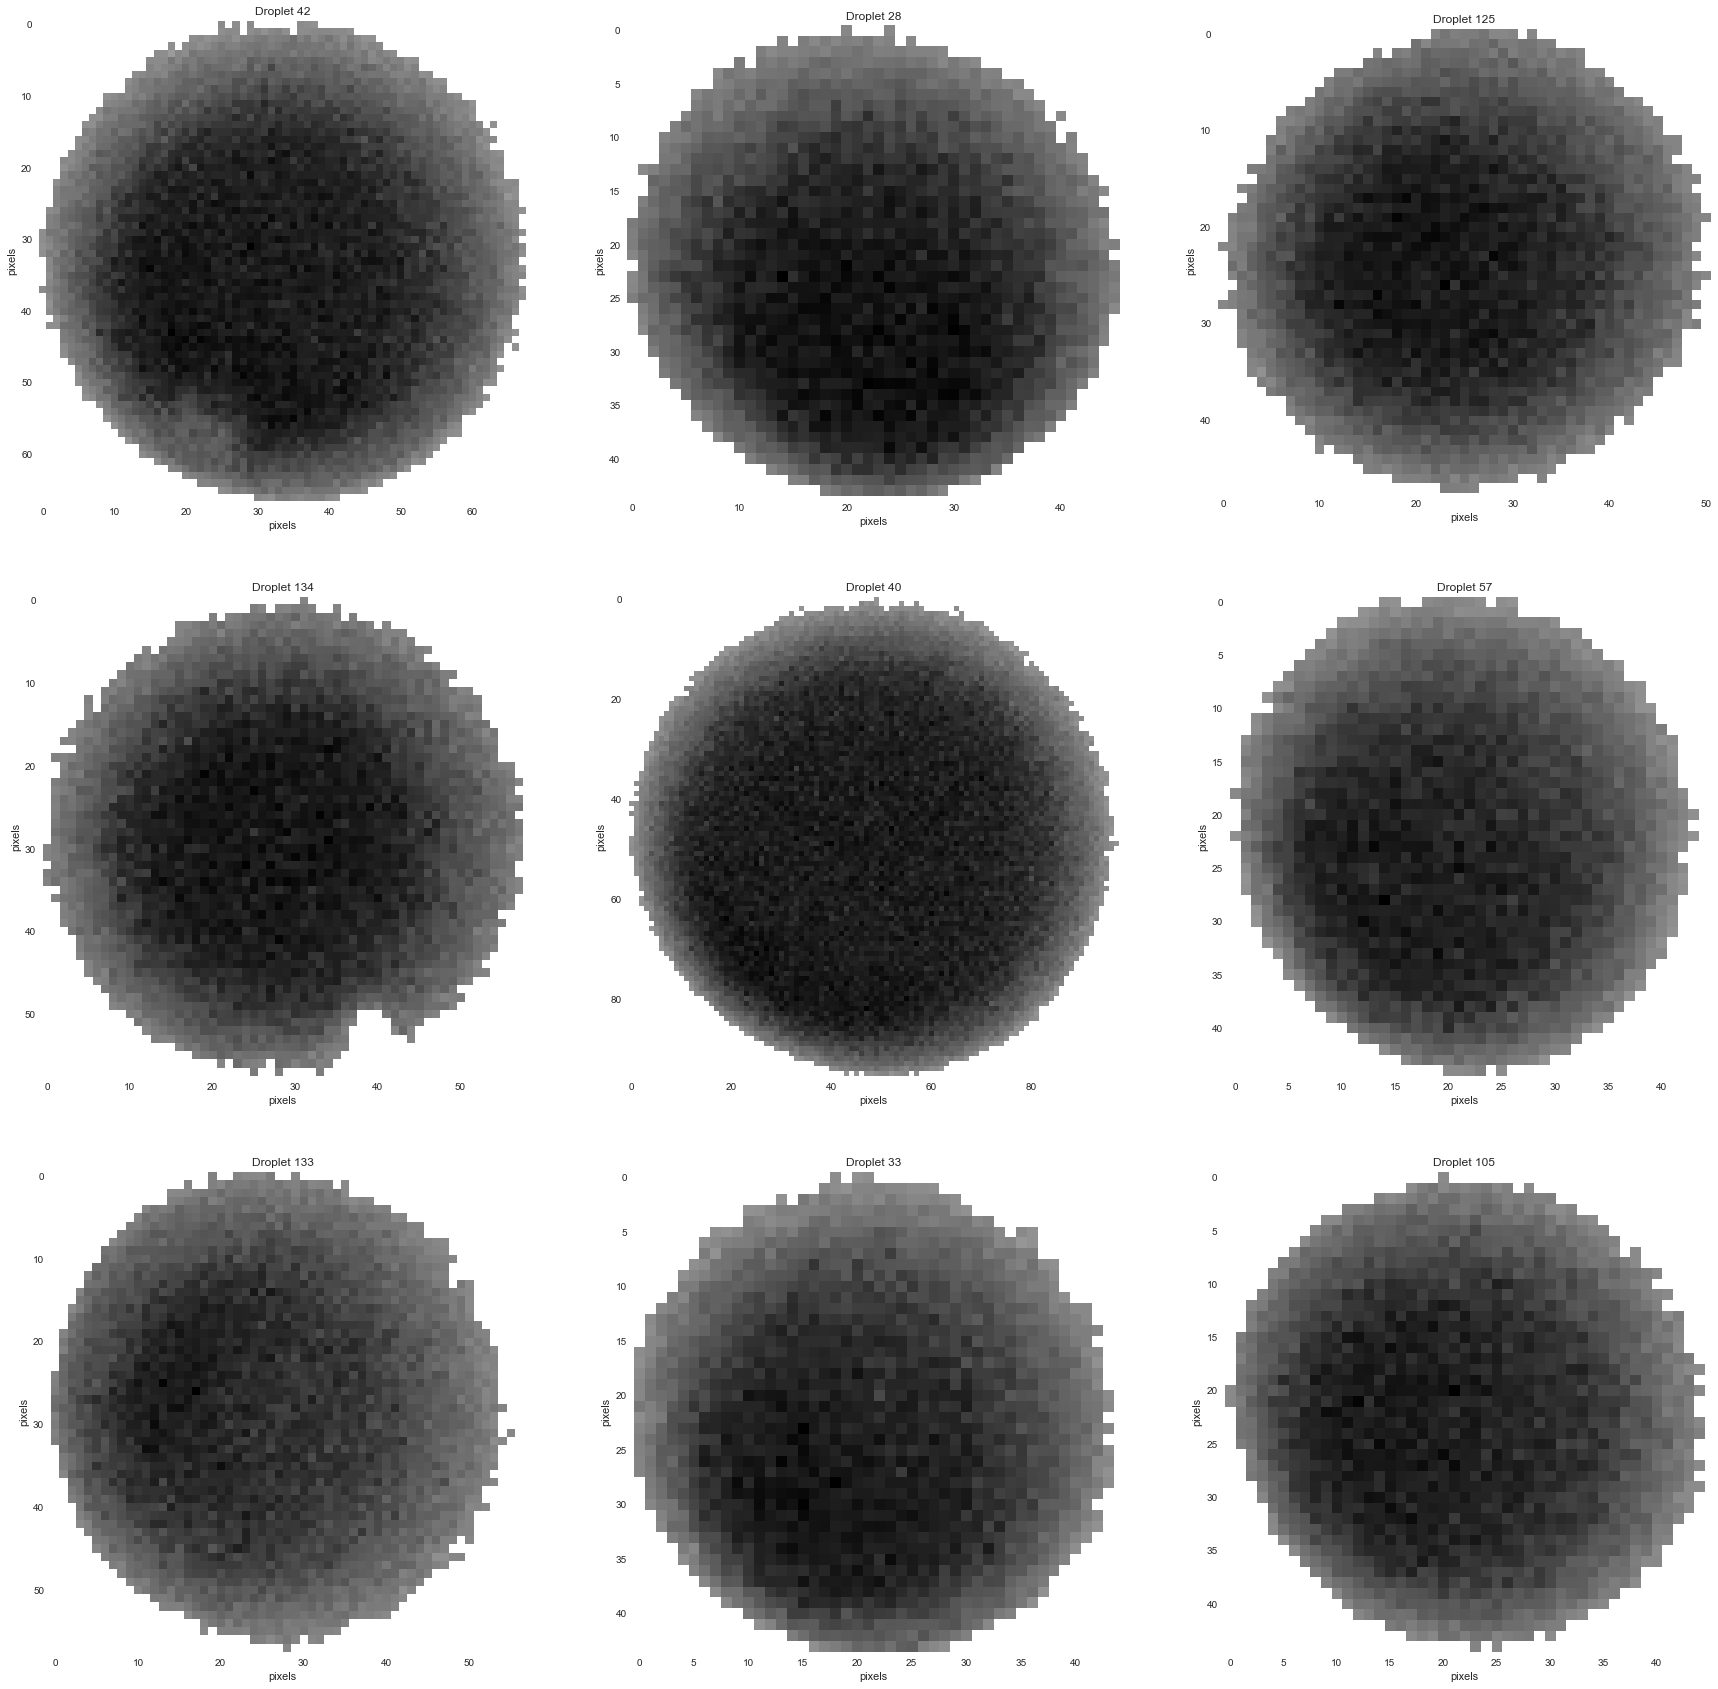

In [99]:
# Define the brightfield image


# Choose the set of random droplets that will be tested
random_values = np.random.randint(len(labeled_droplets), size=(3,3))

with sns.axes_style("dark"):
    fig, ax = plt.subplots(3, 3, figsize = (30, 30))
    for i in range(3):
        for j in range(3):
            selection = random_values[i, j]
            ax[i, j].imshow(bright_droplet_props[selection].intensity_image)
            ax[i, j].set_title("Droplet %i" % selection)
            ax[i, j].set_xlabel('pixels')
            ax[i, j].set_ylabel('pixels')
plt.show()


In [100]:
def segment_image(temp_bw):
    """From an black-white image, return segmented image"""
    
    if thresh_image.max() != 0:
        """temp_thresh = skimage.filters.threshold_otsu(initial_image)

        temp_bw = initial_image > temp_thresh"""
        
        #temp_bw = ndi.binary_fill_holes(temp_bw)

        temp_distance = ndi.distance_transform_edt(temp_bw)

        temp_local_maxi = peak_local_max(temp_distance, labels=temp_bw, footprint=np.ones((8, 8)), indices=False)

        temp_markers = ndi.label(temp_local_maxi)[0]

        temp_labels = skimage.segmentation.watershed(-temp_distance, temp_markers, mask=temp_bw)

        return temp_labels
    else:
        return initial_image

In [103]:
# Threshold the droplets to distinguish cell from droplet

# List to save black-white thesholded cells
bw_droplets = {}
gfp_droplets = {}

# Show the initial random droplets
with sns.axes_style("dark"):
    fig, ax = plt.subplots(3, 3, figsize = (30, 30))
    for i in range(3):
        for j in range(3):
            # Select droplet region
            selection = random_values[i, j]
            temp_image = bright_droplet_props[selection].intensity_image
            temp_gfp_image = gfp_droplet_props[selection].intensity_image
            
            # The background needs to be set to something that won't weight the thresholding
            temp_image[temp_image==0] = temp_image.mean()
            temp_thresh = skimage.filters.threshold_mean(temp_image)
            thresh_image = temp_image < temp_thresh
            
            # Plot the thresholded image
            ax[i, j].imshow(thresh_image)
            ax[i, j].set_title("Droplet %i" % selection)
            ax[i, j].set_xlabel('pixels')
            ax[i, j].set_ylabel('pixels')
            # Add to row 
            bw_droplets[selection] = thresh_image
            gfp_droplets[selection] = temp_gfp_image

NameError: name 'gfp_droplet_props' is not defined

In [109]:
# Read in all image files
num_1_file_names = "../../data/06.27_HeLa-poliovirus/#1/*.tif"
num_1_file_names = glob.glob(num_1_file_names)
num_1_file_names = sorted(num_1_file_names)
pprint.pprint(num_1_file_names)

['../../data/06.27_HeLa-poliovirus/#1/10x.tif',
 '../../data/06.27_HeLa-poliovirus/#1/10x_GFP.tif',
 '../../data/06.27_HeLa-poliovirus/#1/10x_TRANS.tif',
 '../../data/06.27_HeLa-poliovirus/#1/4x.tif',
 '../../data/06.27_HeLa-poliovirus/#1/4x_GFP.tif',
 '../../data/06.27_HeLa-poliovirus/#1/4x_TRANS.tif']


In [113]:
labeled_droplets